In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
lyrics = pd.read_csv('lyrics.csv')
lyrics1 = lyrics.query('genre != "Not Available"')
lyrics1 = lyrics1.dropna()

lyrics2 = lyrics1[lyrics1["genre"] == "Rock"].sample(n=22000)
lyrics3 = lyrics1[lyrics1["genre"] == "Pop"].sample(n=22000)
lyrics4 = lyrics1[lyrics1["genre"] == "Hip-Hop"].sample(n=22000)
lyrics0 = pd.concat([lyrics2, lyrics3, lyrics4])

In [4]:
lyrics.head(10)

,index,song,year,artist,genre,lyrics
0,0,ego-remix,2009,beyonce-knowles,Pop,"Oh baby, how you doing?\nYou know I'm gonna cu..."
1,1,then-tell-me,2009,beyonce-knowles,Pop,"playin' everything so easy,\nit's like you see..."
2,2,honesty,2009,beyonce-knowles,Pop,If you search\nFor tenderness\nIt isn't hard t...
3,3,you-are-my-rock,2009,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote..."
4,4,black-culture,2009,beyonce-knowles,Pop,"Party the people, the people the party it's po..."
5,5,all-i-could-do-was-cry,2009,beyonce-knowles,Pop,I heard\nChurch bells ringing\nI heard\nA choi...
6,6,once-in-a-lifetime,2009,beyonce-knowles,Pop,This is just another day that I would spend\nW...
7,7,waiting,2009,beyonce-knowles,Pop,"Waiting, waiting, waiting, waiting\nWaiting, w..."
8,8,slow-love,2009,beyonce-knowles,Pop,[Verse 1:]\nI read all of the magazines\nwhile...
9,9,why-don-t-you-love-me,2009,beyonce-knowles,Pop,"N-n-now, honey\nYou better sit down and look a..."


In [9]:
bar1, bar2 = np.unique(lyrics1['genre'], return_counts=True)

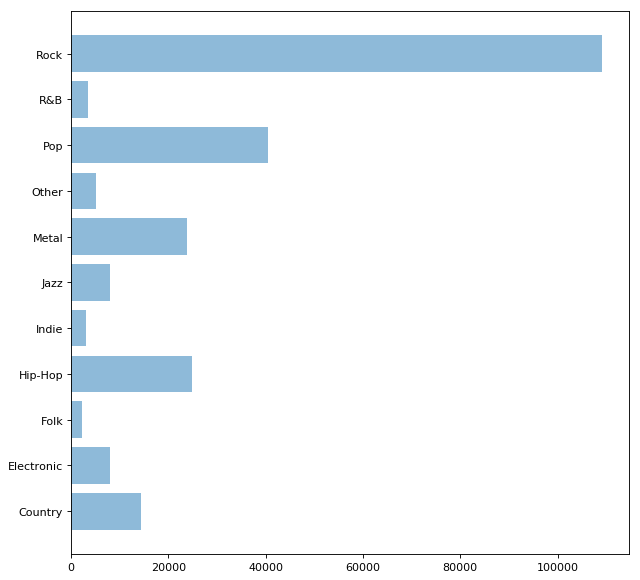

In [10]:
from matplotlib.pyplot import figure

figure(num=1, figsize=(9, 9), dpi=80, facecolor='w', edgecolor='k')

bar11 = np.arange(len(bar1))
plt.barh(bar11, bar2, align='center', alpha=0.5)
plt.yticks(bar11, bar1)

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(lyrics0, train_size=.7)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

text_clf = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss="log", n_iter = 2)),
])

In [27]:
text_clf.fit(x_train['lyrics'], x_train['genre'])

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [58]:
x_train.head()

,index,song,year,artist,genre,lyrics
9130,9130,miedo,2008,alexander-achavoy,Pop,Cuando yo te conoci me atrapaste en tu mirada\...
301665,301665,no-debes-marchar,2015,duncan-dhu,Rock,"Todo sigue ahÃ­, tal y como lo dejÃ©\nLa hierb..."
144215,144215,thick-and-thin,2013,bronze-radio-return,Rock,These bags are carry-on\nAnd filled with many ...
321715,321715,around-the-bay,2008,department-of-eagles,Electronic,"You're all too older today\nAll my words, they..."
204316,204316,screaming,2006,bronski-beat,Pop,My man love my first love\nMy closetness and p...


In [28]:
predicted = text_clf.predict(x_test['lyrics'])

### An SGD classifier got about 71% accuracy whereas a randomforest got about 65% accuracy

In [29]:
np.mean(predicted == x_test['genre'])

0.6742929292929293

In [1]:
lyrics1[0]

NameError: name 'lyrics1' is not defined

### Next step: Read about convolutional neural networks, slim down the songs dataset to give about equal representation to each genre and pick maybe 2 or 3 genres. Try to fit a CNN to the new dataset. Also some songs are in Spanish -- you may want to find a way to take this out

In [3]:
lyrics2 = lyrics1[lyrics1["genre"] == "Rock"].sample(n=22000)

In [9]:
lyrics2.head()

,index,song,year,artist,genre,lyrics
15617,15617,bomb-plus-bomb-tape,2007,crass,Rock,Twenty odd years now waiting for the flash\nch...
202211,202211,liar,2006,ghost-of-the-robot,Rock,I don't mean to sound mean when I talk about t...
286046,286046,knife-prty,2000,deftones,Rock,My knife it's sharp and chrome\nCome see insid...
24678,24678,paranoid,1970,black-sabbath,Rock,Finished with my woman 'cause she couldn't hel...
33554,33554,fame,2004,citizen-cope,Rock,"Got the law man, the con man, the liquor store..."


In [19]:
print(lyrics["lyrics"][0])

Oh baby, how you doing?
You know I'm gonna cut right to the chase
Some women were made but me, myself
I like to think that I was created for a special purpose
You know, what's more special than you? You feel me
It's on baby, let's get lost
You don't need to call into work 'cause you're the boss
For real, want you to show me how you feel
I consider myself lucky, that's a big deal
Why? Well, you got the key to my heart
But you ain't gonna need it, I'd rather you open up my body
And show me secrets, you didn't know was inside
No need for me to lie
It's too big, it's too wide
It's too strong, it won't fit
It's too much, it's too tough
He talk like this 'cause he can back it up
He got a big ego, such a huge ego
I love his big ego, it's too much
He walk like this 'cause he can back it up
Usually I'm humble, right now I don't choose
You can leave with me or you could have the blues
Some call it arrogant, I call it confident
You decide when you find on what I'm working with
Damn I know I'm kil

In [4]:
lyrics3 = lyrics1[lyrics1["genre"] == "Pop"].sample(n=22000)

In [5]:
lyrics4 = lyrics1[lyrics1["genre"] == "Hip-Hop"].sample(n=22000)

In [6]:
lyrics0 = pd.concat([lyrics2, lyrics3, lyrics4])

In [35]:
lyrics0.shape

(66000, 6)

In [38]:
def get_num_words_per_sample(sample_texts):
    """Returns the median number of words per sample given corpus.

    # Arguments
        sample_texts: list, sample texts.

    # Returns
        int, median number of words per sample.
    """
    num_words = [len(s.split()) for s in sample_texts]
    return np.median(num_words)

get_num_words_per_sample(lyrics0["lyrics"])

250.0

In [42]:
get_num_words_per_sample(lyrics0["lyrics"][0:21999])

178.0

In [43]:
get_num_words_per_sample(lyrics0["lyrics"][22000:43999])

224.0

In [44]:
get_num_words_per_sample(lyrics0["lyrics"][44000:65999])

485.0

### The above function shows that hip-hop is much more likely to contain more words than either pop or rock, which makes sense since a hip-hop song consists of all words whereas a rock or pop song may contain more musical sections with only a sparse amount of words

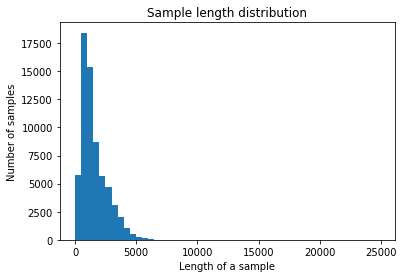

In [45]:
def plot_sample_length_distribution(sample_texts):
    """Plots the sample length distribution.

    # Arguments
        samples_texts: list, sample texts.
    """
    plt.hist([len(s) for s in sample_texts], 50)
    plt.xlabel('Length of a sample')
    plt.ylabel('Number of samples')
    plt.title('Sample length distribution')
    plt.show()
    
plot_sample_length_distribution(lyrics0["lyrics"])

In [53]:
360000/250

1440.0

In [30]:
text_clf.predict_proba(["Let me be your one light \n And if you'd like a true heart \n Take the time to show you're mine\n And I'll be a blue moon in the dark\nWhile you sleep you'll see me there\nClouds race across the sky \nClose your eyes and don't ask why \n And I'll be a blue moon in your eyes \n Morning comes and sleeping's done\nBirds sing outside \n If demons come while you're under \n I'll be a blue moon in the sky \n Let me be your one light \n And if you'd like a true heart \n Take the time to show you're mine \n And I'll be a blue moon in the dark"])

array([[0.08611026, 0.50397643, 0.4099133 ]])

### Y = PCA(n-com matrix = 2).fit_transform(X)

In [5]:
songs = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer()),
])

In [8]:
songs.fit(x_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True))])

In [6]:
x_vec = CountVectorizer().fit_transform(x_train["lyrics"])

songs = TfidfTransformer().fit_transform(x_vec)

In [27]:
songs.shape

(46200, 179665)

In [7]:
from sklearn.decomposition import TruncatedSVD

Y = TruncatedSVD(n_components=2).fit_transform(songs)

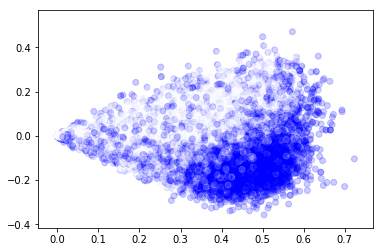

In [21]:
U = x_train["genre"].map({"Pop":"white", "Rock":"white", "Hip-Hop":"blue" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

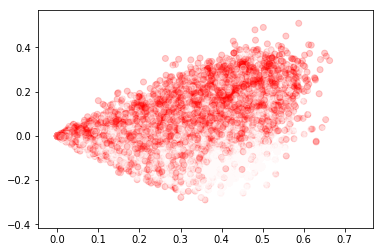

In [22]:
U = x_train["genre"].map({"Pop":"red", "Rock":"white", "Hip-Hop":"white" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

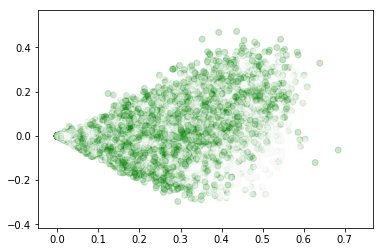

In [23]:
U = x_train["genre"].map({"Pop":"white", "Rock":"green", "Hip-Hop":"white" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

In [9]:
from sklearn.manifold import TSNE

In [37]:
Y = PCA(n_components=25).fit_transform(sig_songs)
YT = TSNE(n_components=2).fit_transform(Y)

KeyboardInterrupt: 

In [11]:
from sklearn.feature_selection import chi2

In [13]:
c2 = chi2(songs, x_train["genre"])

(array([1.79596e+05, 4.80000e+01, 1.10000e+01, 4.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([7.23359049e-05, 9.49135411e+01, 1.89827010e+02, 2.84740479e+02,
        3.79653947e+02, 4.74567416e+02, 5.69480885e+02, 6.64394353e+02,
        7.59307822e+02, 8.54221291e+02, 9.49134760e+02]),
 <a list of 10 Patch objects>)

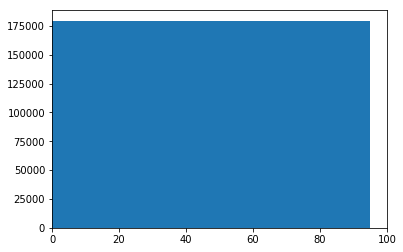

In [19]:
plt.xlim([0,100])
plt.hist(c2[])

In [21]:
(c2[1] <0.05).sum()

2528

In [26]:
len(c2[1])

179665

In [31]:
sig_songs = songs[:,c2[1] < 0.05].todense()

In [47]:
P = PCA(n_components=20).fit(sig_songs)

VARS = P.explained_variance_

#fit_transform(sig_songs)

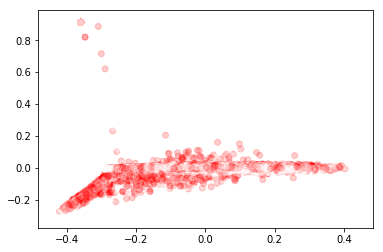

In [44]:
U = x_train["genre"].map({"Pop":"red", "Rock":"white", "Hip-Hop":"white" })

plt.scatter(YP[:,0], YP[:,2], c= U, alpha=0.2)

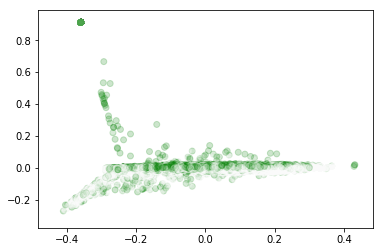

In [43]:
U = x_train["genre"].map({"Pop":"white", "Rock":"green", "Hip-Hop":"white" })

plt.scatter(YP[:,0], YP[:,2], c= U, alpha=0.2)

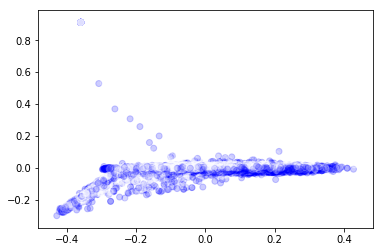

In [42]:
U = x_train["genre"].map({"Pop":"white", "Rock":"white", "Hip-Hop":"blue" })

plt.scatter(YP[:,0], YP[:,2], c= U, alpha=0.2)

In [48]:
VARS

array([0.02096897, 0.01187469, 0.00706154, 0.0062615 , 0.00579228,
       0.00479273, 0.00439548, 0.0041761 , 0.00389022, 0.00351319,
       0.00318926, 0.00312726, 0.0028555 , 0.00269199, 0.00261547,
       0.00246491, 0.00236672, 0.00222727, 0.00212463, 0.00205364])

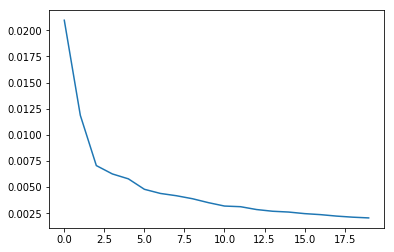

In [49]:
plt.plot(VARS)

### Investigate the data more, perhaps using the same techniques as before. Make a clean copy of what you've done so far to post on github. Perhaps build a new classifier using only 2 genres like pop or rock & hip hop since those seem to have the most difference. Perhaps try to feed the svd with only 2 singular values which contains less features to the classifier to avoid overfitting

In [14]:
folk = lyrics1[lyrics1["genre"] == "Rock"]

In [15]:
x_vec = CountVectorizer().fit_transform(folk["lyrics"])

folk_songs = TfidfTransformer().fit_transform(x_vec)

In [16]:
from sklearn.decomposition import TruncatedSVD

Y = TruncatedSVD(n_components=2).fit_transform(folk_songs)

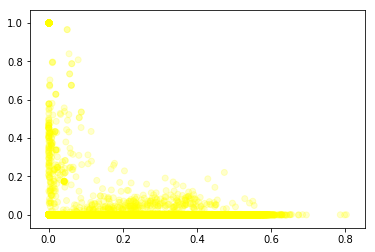

In [17]:
U = folk["genre"].map({"Rock":"yellow"})

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)

### The above looks strange because when you create a tfidf matrix with only 1 genre then you will find different features. Perhaps use all of lyrics df to make these pictures and figure out how to make all but one genre actually invisible

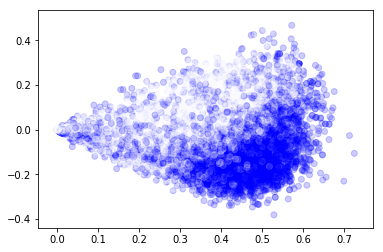

In [8]:
U = x_train["genre"].map({"Pop":"white", "Rock":"white", "Hip-Hop":"blue" })

plt.scatter(Y[:,0], Y[:,1], c= U, alpha=0.2)